In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# pd.set_option('display.max_columns', None) # Show all columns
# num_files=100000

# def create_dataframe_from_json(directory_path, num_files):
#     dfs = {}
    
#     # Get the list of subdirectories in the main directory
#     subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    
#     # -----------------------------------------------------------------------------
#     subdirectories.remove("cube_sportsbook_bet_selection")
#     subdirectories.remove("cube_sportsbook_bet")
#     print(subdirectories)
#     # -----------------------------------------------------------------------------
    
#     for subdir in subdirectories:
#         subdir_path = os.path.join(directory_path, subdir)
#         json_files = [f for f in os.listdir(subdir_path) if f.endswith('.json')][:num_files]
        
#         # Create a list to hold the data from each JSON file
#         data = []
#         for json_file in json_files:
#             file_path = os.path.join(subdir_path, json_file)
#             try:
#                 json_data = pd.read_json(file_path, lines=True)
#                 data.append(json_data)
#             except ValueError:
#                 print(f"Error parsing JSON in file: {json_file}. Skipping this file.")
        
#         # Create a DataFrame for the current subdirectory
#         df = pd.concat(data)
        
#         # Append the DataFrame to the list of DataFrames
#         dfs[subdir] = df
    
#     return dfs

# if __name__ == "__main__":
#     # Replace the 'directory_path' with the actual path to your main directory
#     directory_path = "/Users/omrilapidot/Vbet_data"
#     dataframes = create_dataframe_from_json(directory_path, num_files=num_files)

In [3]:
# import pickle
# with open('/Users/omrilapidot/Vbet_adjusted_data/dataframes.pkl', 'wb') as f:
#     pickle.dump(dataframes, f)

In [4]:
with open('/Users/omrilapidot/Vbet_adjusted_data/dataframes.pkl', 'rb') as f:
    dataframes = pickle.load(f)

In [5]:
dataframes.keys()

dict_keys(['ClientSportsbookProfile', 'viewmat_ClientDetails', 'ClientLimit', 'ClientRestriction', 'ClientSession', 'ClientKPI', 'cube_finance', 'cube_CasinoSpins', 'cube_sportsbook_bet'])

In [6]:
# pd.read_csv('/Users/omrilapidot/Downloads/gdai_data_BonusData_Bonuses_info_13_weeks_result28_09_2023.csv')  

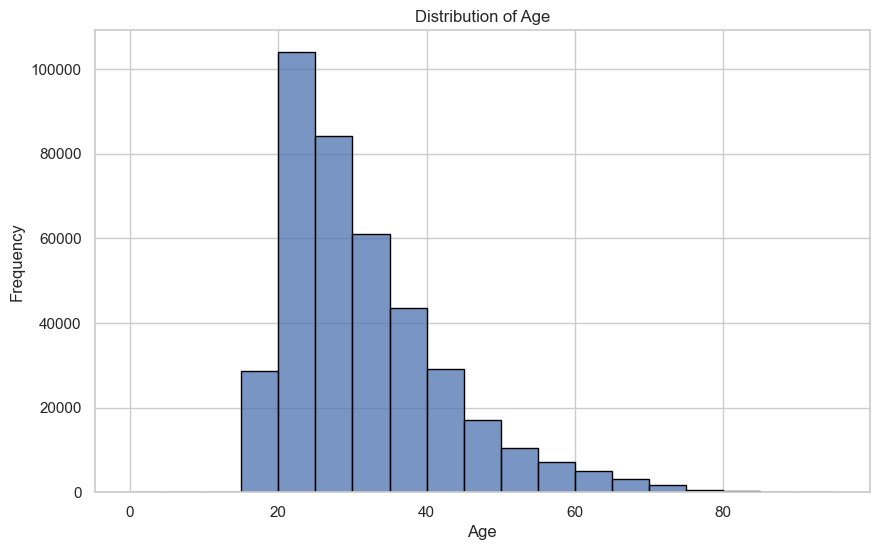

In [7]:
valid_age_data = dataframes["viewmat_ClientDetails"].dropna(subset=['Age'])

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create a histogram of the Age column
ax = sns.histplot(data=valid_age_data, x='Age', bins=[i for i in range(0,100,5)], edgecolor='black')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Age')
plt.show()


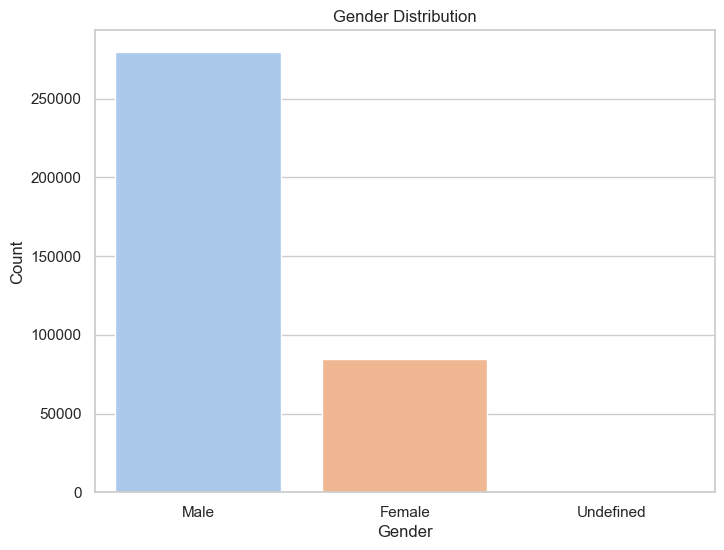

In [8]:
# Count the occurrences of each gender
gender_counts = dataframes["viewmat_ClientDetails"]["ClientGender"].value_counts()

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Create a bar plot of the gender distribution
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')
plt.show()


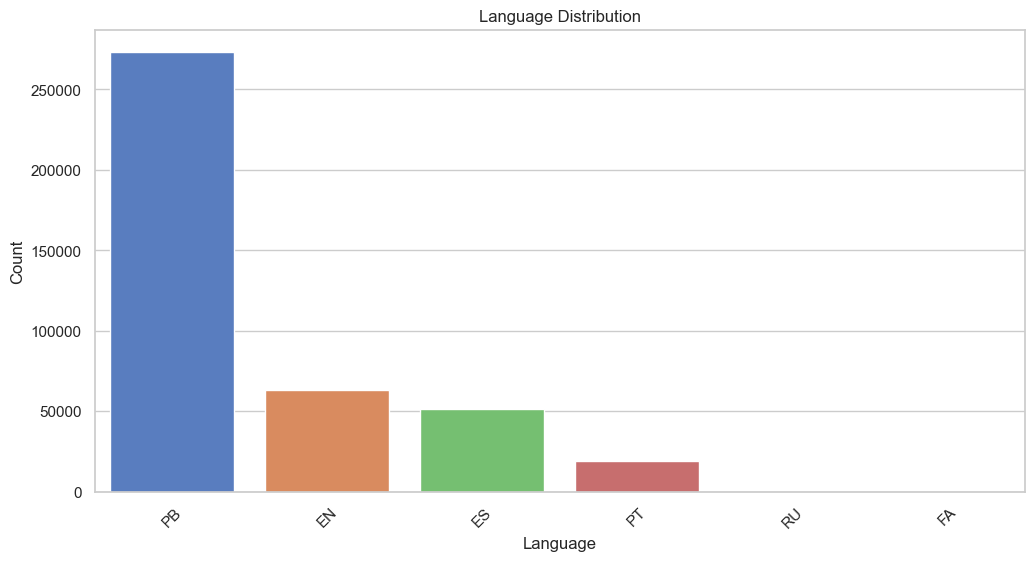

In [9]:
# Count the occurrences of each language
language_counts = dataframes["viewmat_ClientDetails"]["Language"].value_counts()

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create a bar plot of the language distribution
ax = sns.barplot(x=language_counts.index, y=language_counts.values, palette='muted')
ax.set_xlabel('Language')
ax.set_ylabel('Count')
ax.set_title('Language Distribution')
plt.xticks(rotation=45)
plt.show()


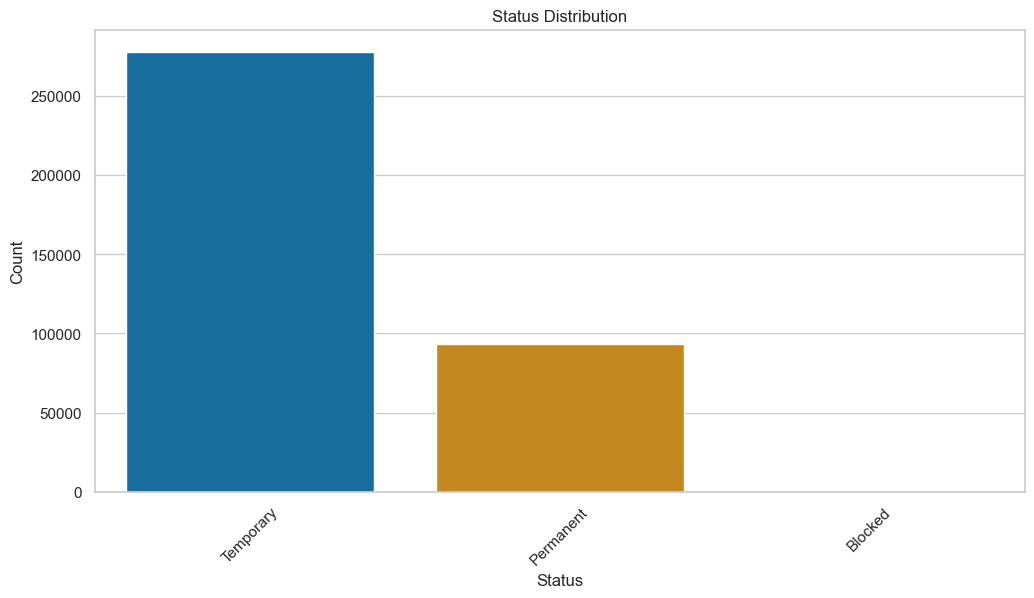

In [10]:
# Count the occurrences of each status
status_counts = dataframes["viewmat_ClientDetails"]["StatusName"].value_counts()

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create a bar plot of the status distribution
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='colorblind')
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_title('Status Distribution')
plt.xticks(rotation=45)
plt.show()


/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_2842/2268577226.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframes["viewmat_ClientDetails"]["YearMonth"] = dataframes["viewmat_ClientDetails"]["Created"].dt.to_period('M').astype(str)


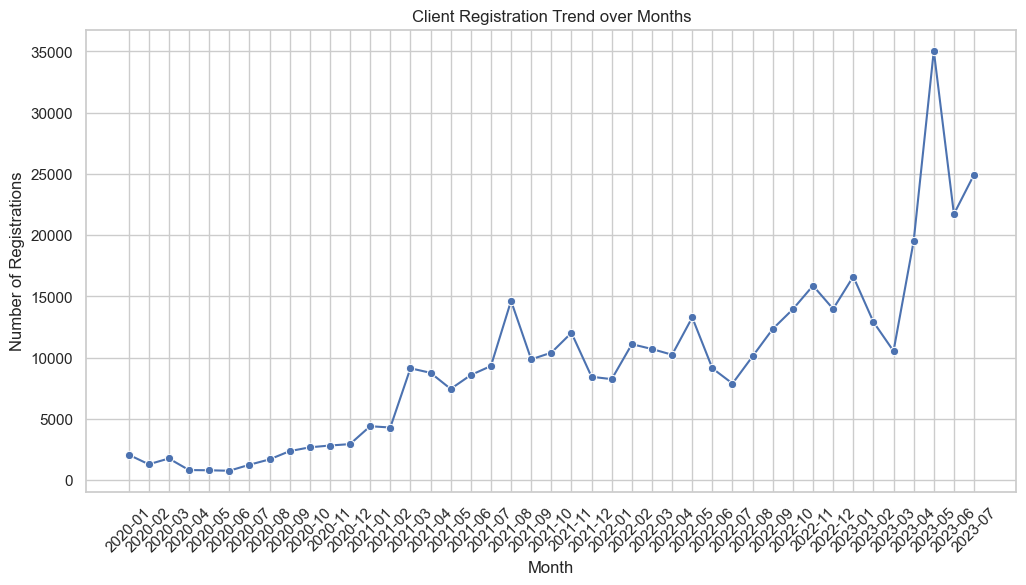

In [11]:
from dateutil.parser import parse
# Assuming 'Created' column is not already in datetime format, parse it using dateutil.parser.parse
dataframes["viewmat_ClientDetails"]["Created"] = dataframes["viewmat_ClientDetails"]["Created"].apply(parse)

# Extract month and year from the 'Created' column
dataframes["viewmat_ClientDetails"]["YearMonth"] = dataframes["viewmat_ClientDetails"]["Created"].dt.to_period('M').astype(str)

# Count the number of registrations per month
registrations_per_month = dataframes["viewmat_ClientDetails"]["YearMonth"].value_counts().sort_index()

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create a line plot of the registration trend over months
ax = sns.lineplot(x=registrations_per_month.index, y=registrations_per_month.values, marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Registrations')
ax.set_title('Client Registration Trend over Months')
plt.xticks(rotation=45)
plt.show()


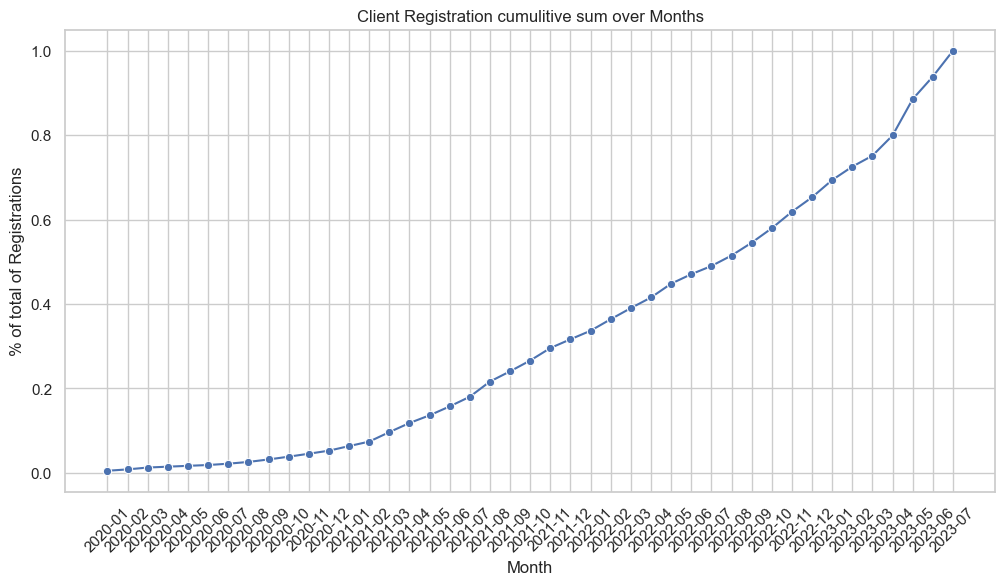

In [61]:
# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create a line plot of the registration trend over months
cumsum = registrations_per_month.values.cumsum()
ax = sns.lineplot(x=registrations_per_month.index, y=cumsum/cumsum[-1], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('% of total of Registrations')
ax.set_title('Client Registration cumulitive sum over Months')
plt.xticks(rotation=45)
plt.show()

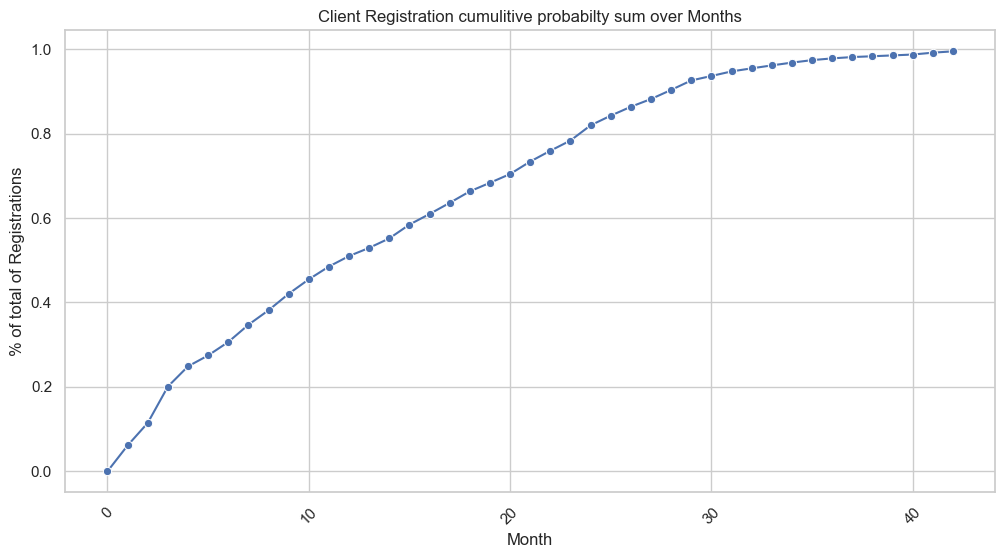

In [13]:
# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
arange = np.arange(len(cumsum))
# Create a line plot of the registration trend over months
cumsum = registrations_per_month.values.cumsum()
ax = sns.lineplot(x=arange[-1]-arange, y=1-cumsum/cumsum[-1], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('% of total of Registrations')
ax.set_title('Client Registration cumulitive probabilty sum over Months')
plt.xticks(rotation=45)
plt.show()

In [14]:
with open('/Users/omrilapidot/Vbet_adjusted_data/dates_df.pkl', 'rb') as f:
    dates_df = pickle.load(f)

/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_2842/3352836100.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dates_df["YearMonth"] = dates_df["FTD_date"].dt.to_period('M').astype(str)


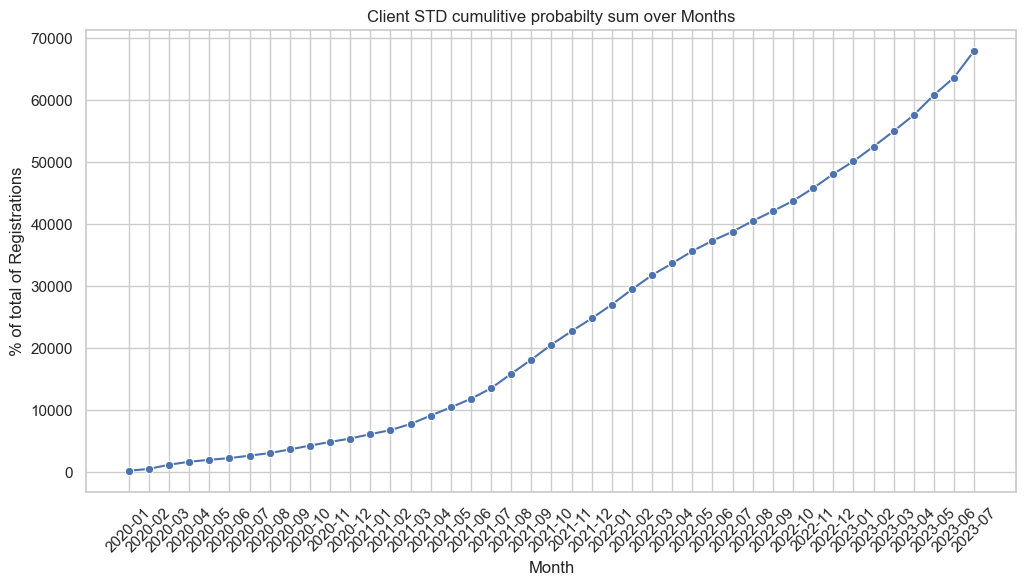

In [15]:
dates_df["YearMonth"] = dates_df["FTD_date"].dt.to_period('M').astype(str)
t = dates_df["YearMonth"].value_counts().sort_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
arange = np.arange(len(cumsum))
# Create a line plot of the registration trend over months
# cumsum = registrations_per_month.values.cumsum()
ax = sns.lineplot(x=t.index, y=t.values.cumsum(), marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('% of total of Registrations')
ax.set_title('Client STD cumulitive probabilty sum over Months')
plt.xticks(rotation=45)
plt.show()

/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_2842/2160240355.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dates_df["YearMonth"] = dates_df["STD_date"].dt.to_period('M').astype(str)


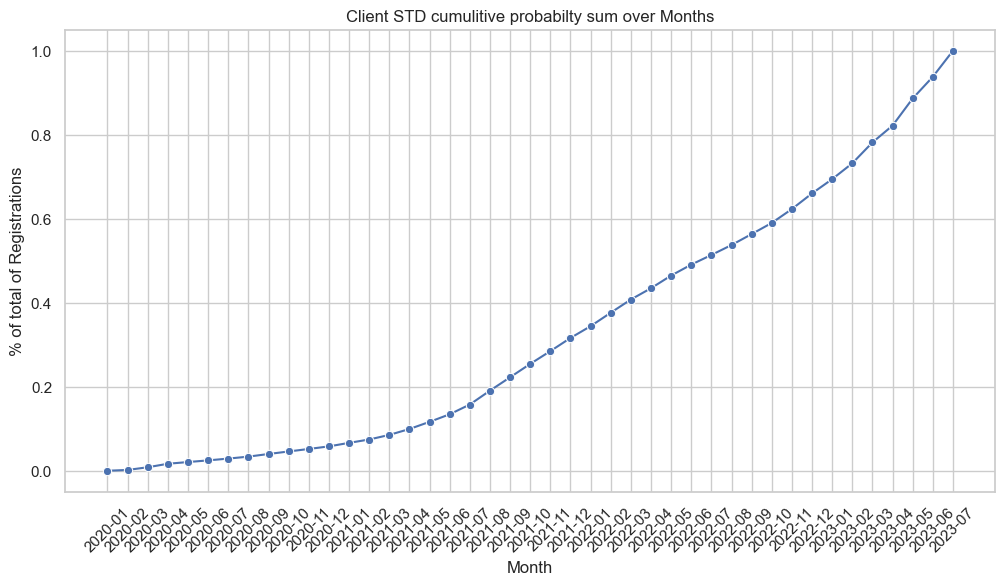

In [16]:
dates_df["YearMonth"] = dates_df["STD_date"].dt.to_period('M').astype(str)
t = dates_df["YearMonth"].value_counts().sort_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
arange = np.arange(len(cumsum))
# Create a line plot of the registration trend over months
# cumsum = registrations_per_month.values.cumsum()
ax = sns.lineplot(x=t.index[0:-1], y=t.values.cumsum()[0:-1]/t.values.cumsum()[-2], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('% of total of Registrations')
ax.set_title('Client STD cumulitive probabilty sum over Months')
plt.xticks(rotation=45)
plt.show()

In [17]:
dates_df

,ClientId,FTD_date,STD_date,YearMonth
0,177054004,2020-01-01 19:00:00+00:00,2020-01-09 13:00:00+00:00,2020-01
1,177064942,2020-01-01 20:00:00+00:00,NaT,NaT
2,177065994,2020-01-02 11:00:00+00:00,NaT,NaT
3,177071940,2020-01-01 21:00:00+00:00,NaT,NaT
4,177079786,2023-05-24 19:00:00+00:00,NaT,NaT
...,...,...,...,...
67962,1597106625,2023-07-30 22:00:00+00:00,NaT,NaT
67963,1597288970,2023-07-30 23:00:00+00:00,NaT,NaT
67964,1597363134,2023-07-30 23:00:00+00:00,NaT,NaT
67965,1597366753,2023-07-30 23:00:00+00:00,2023-07-31 00:00:00+00:00,2023-07


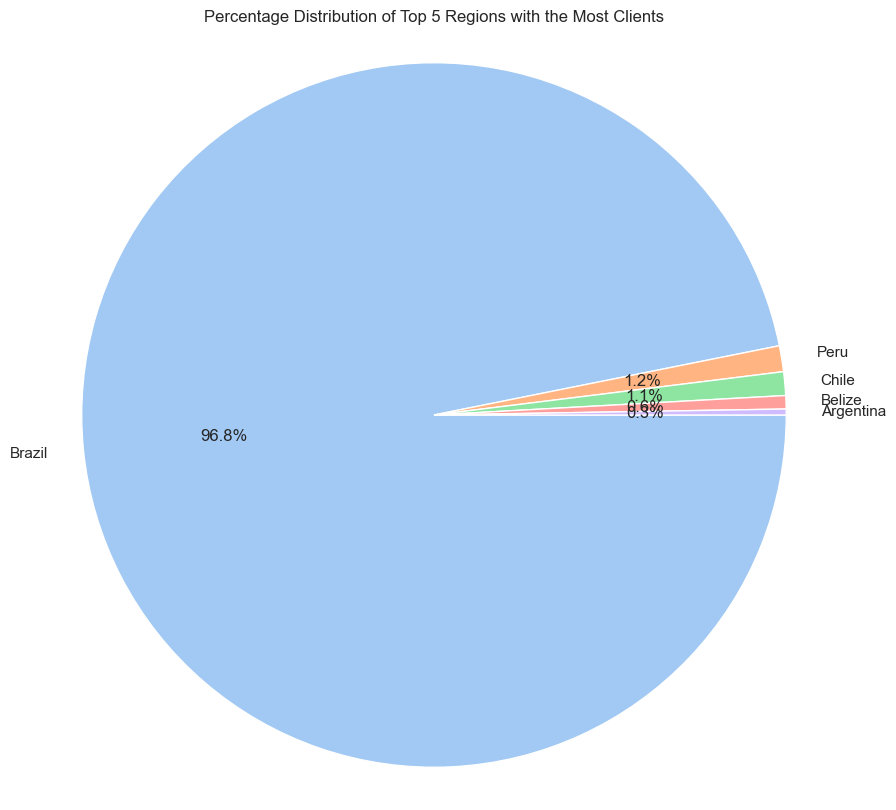

In [18]:
# Count the occurrences of each region
region_counts = dataframes["viewmat_ClientDetails"]["Region"].value_counts()

# Select the top 5 regions with the most clients
top_n_regions = 5
top_regions = region_counts.nlargest(top_n_regions)

# Set seaborn style
sns.set(style='whitegrid')

# Create a pie chart of the top 5 region distribution
plt.figure(figsize=(10, 10))
ax = plt.pie(top_regions.values, labels=top_regions.index, autopct='%1.1f%%', startangle=0, colors=sns.color_palette('pastel'), counterclock=False)
plt.title(f'Percentage Distribution of Top {top_n_regions} Regions with the Most Clients')
plt.axis('equal')
plt.show()

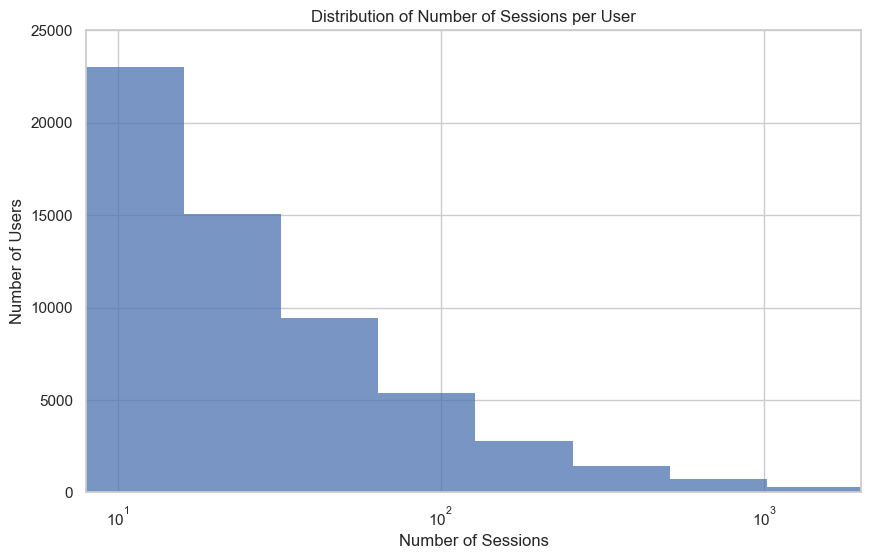

In [19]:


# Group by 'ClientId' and count the number of sessions per user
sessions_per_user = dataframes["ClientSession"].groupby('ClientId').size()

# Set seaborn style
sns.set(style='whitegrid')

# Create a histogram of the number of sessions per user
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=sessions_per_user, bins=[2**i for i in range(16)], edgecolor='black')
ax.set_xscale('log')
ax.set_xlim(8,2000)
ax.set_ylim(0,25000)
ax.set_xlabel('Number of Sessions')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Number of Sessions per User')
plt.show()


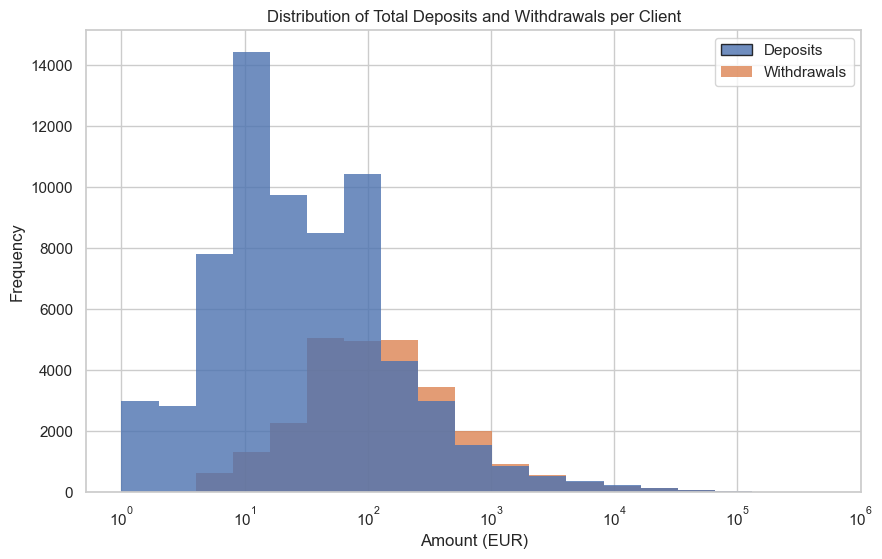

In [20]:
# Group by 'ClientId' and calculate the sum of total deposits and withdrawals for each client
client_summary = dataframes["cube_finance"].groupby('ClientId').agg(
    TotalDeposits=('DepositAmountInEUR', 'sum'),
    TotalWithdrawals=('WithdrawalAmountInEUR', 'sum')
)

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create a histogram of the sum of total deposits and withdrawals
ax = sns.histplot(data=client_summary, bins=[2**i for i in range(20)], edgecolor='black', alpha=0.8)
ax.set_xscale('log')
ax.set_xlabel('Amount (EUR)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Total Deposits and Withdrawals per Client')
plt.legend(labels=['Deposits', 'Withdrawals'])
plt.show()


/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_2842/1285738131.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframes["cube_finance"]["Month"] = dataframes["cube_finance"]["TimestampHour"].dt.to_period('M')


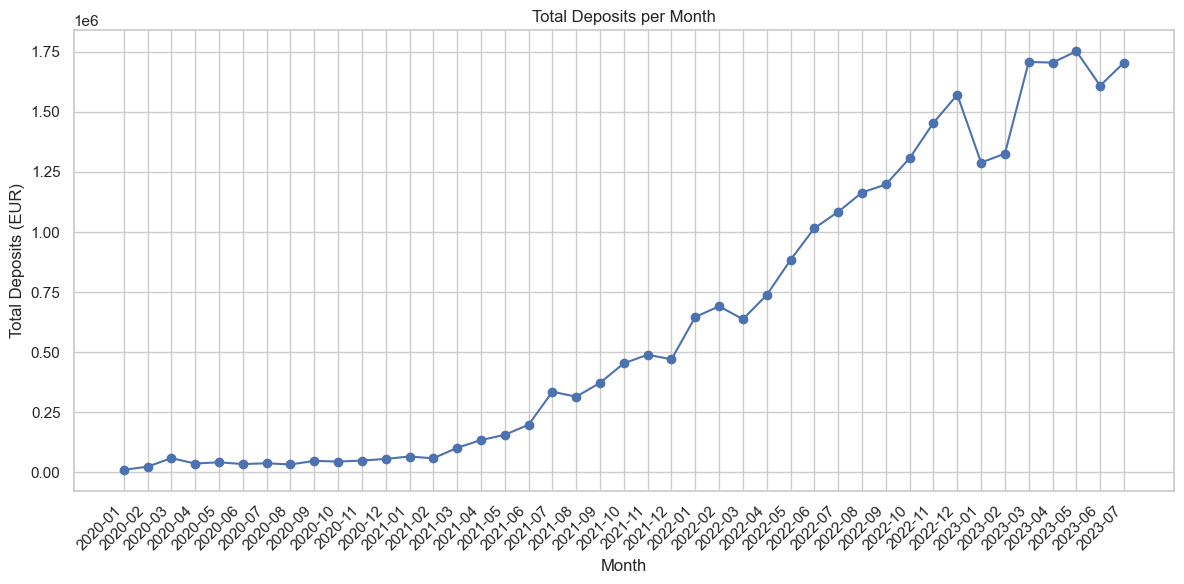

In [21]:
# Convert 'TimestampHour' column to datetime type
dataframes["cube_finance"]["TimestampHour"] = pd.to_datetime(dataframes["cube_finance"]["TimestampHour"])

# Extract month from the 'TimestampHour' column
dataframes["cube_finance"]["Month"] = dataframes["cube_finance"]["TimestampHour"].dt.to_period('M')

# Group by 'Month' and calculate the sum of total deposits for each month
total_deposits_per_month = dataframes["cube_finance"].groupby('Month')['DepositAmountInEUR'].sum()

# Drop rows with invalid values in the 'TotalDeposits' column
total_deposits_per_month = total_deposits_per_month.dropna()

# Convert 'Month' to string representation
total_deposits_per_month.index = total_deposits_per_month.index.strftime('%Y-%m')

# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create a line plot of the total deposits per month using matplotlib
plt.plot(total_deposits_per_month.index, total_deposits_per_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Deposits (EUR)')
plt.title('Total Deposits per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [22]:
# # Calculate the total paid bonuses and cashback bonuses for each client
# dataframes["cube_finance"]["TotalPaidBonuses"] = dataframes["cube_finance"]["PaidBonusAmountInEUR"]
# dataframes["cube_finance"]["TotalCashBackBonuses"] = dataframes["cube_finance"]["CashBackBonusAmountInEUR"]

# # Set seaborn style
# sns.set(style='whitegrid')
# plt.figure(figsize=(10, 6))

# # Create a bar plot of total paid bonuses and cashback bonuses
# ax = sns.barplot(data=dataframes["cube_finance"][["TotalPaidBonuses", "TotalCashBackBonuses"]], ci=None)
# ax.set_ylabel('Amount (EUR)')
# ax.set_title('Total Paid Bonuses vs. Total Cashback Bonuses')
# plt.legend(labels=['Paid Bonuses', 'Cashback Bonuses'])
# plt.show()


In [23]:
# do we have VIP players criteria?

In [24]:
# predict_proba() to check

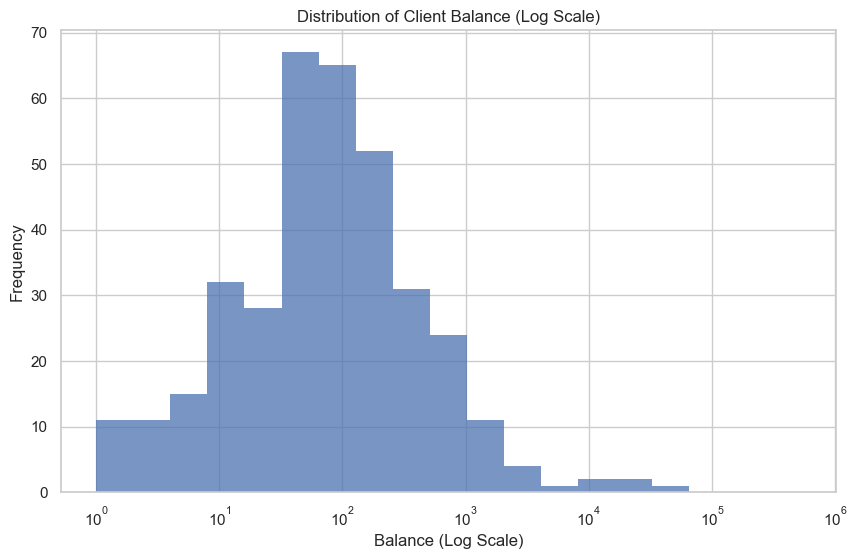

In [25]:
# Set seaborn style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

df_2022_01_01 = dataframes["ClientKPI"][
    (dataframes["ClientKPI"]["Date"].dt.year == 2022) &
    (dataframes["ClientKPI"]["Date"].dt.month == 1) &
    (dataframes["ClientKPI"]["Date"].dt.day == 1)
]
# Create a histogram of the Balance column with a logarithmic x-axis
ax = sns.histplot(data=df_2022_01_01, x='Balance', bins=[2**i for i in range (20)], edgecolor='black')
ax.set_xscale('log')
ax.set_xlabel('Balance (Log Scale)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Client Balance (Log Scale)')
plt.show()

In [26]:
# keys_ = dataframes.keys()
# for key in keys_:
#     print(key)
#     print(dataframes[key].dtypes)

In [27]:
# Step 1: Get unique users from each data frame that has the 'ClientId' attribute
unique_users_dict = {}
for key in dataframes.keys():
    if 'ClientId' in dataframes[key]:
        unique_users_dict[key] = set(dataframes[key]['ClientId'].unique())

# Check if there are data frames with the 'ClientId' attribute
if not unique_users_dict:
    print("No data frames with 'ClientId' attribute found.")
else:
    # Step 2: Calculate the intersection of unique users between each pair of data frames
    for key1, unique_users1 in unique_users_dict.items():
        for key2, unique_users2 in unique_users_dict.items():
            if key1 != key2:
                common_users = unique_users1.intersection(unique_users2)
                common_users_percentage = len(common_users) / len(unique_users1) * 100
                print(f"Common users between '{key1}' and '{key2}': {common_users_percentage:.2f}%")


Common users between 'ClientLimit' and 'ClientRestriction': 100.00%
Common users between 'ClientLimit' and 'ClientSession': 100.00%
Common users between 'ClientLimit' and 'ClientKPI': 81.43%
Common users between 'ClientLimit' and 'cube_finance': 81.43%
Common users between 'ClientLimit' and 'cube_CasinoSpins': 40.00%
Common users between 'ClientLimit' and 'cube_sportsbook_bet': 75.71%
Common users between 'ClientRestriction' and 'ClientLimit': 0.02%
Common users between 'ClientRestriction' and 'ClientSession': 95.28%
Common users between 'ClientRestriction' and 'ClientKPI': 28.05%
Common users between 'ClientRestriction' and 'cube_finance': 17.30%
Common users between 'ClientRestriction' and 'cube_CasinoSpins': 18.53%
Common users between 'ClientRestriction' and 'cube_sportsbook_bet': 13.81%
Common users between 'ClientSession' and 'ClientLimit': 0.02%
Common users between 'ClientSession' and 'ClientRestriction': 100.00%
Common users between 'ClientSession' and 'ClientKPI': 29.24%
Comm

In [28]:
# subdir_path = "/Users/omrilapidot/Vbet_data/cube_sportsbook_bet"
# json_files = [f for f in os.listdir(subdir_path) if f.endswith('.json')]

# # Create a list to hold the data from each JSON file
# data = []
# print(len(json_files))
# i = 0
# for json_file in json_files:
#     if i%100==0:
#         print(i)
#     i+=1
#     file_path = os.path.join(subdir_path, json_file)
#     try:
#         json_data = pd.read_json(file_path, lines=True)
#         data.append(json_data)
#     except ValueError:
#         print(f"Error parsing JSON in file: {json_file}. Skipping this file.")

# # Create a DataFrame for the current subdirectory
# df = pd.concat(data)

In [29]:
# dataframes["cube_sportsbook_bet"] = df

In [30]:
# import pickle
# with open('/Users/omrilapidot/Vbet_adjusted_data/cube_sportsbook_bet.pkl', 'wb') as f:
#     pickle.dump(df, f)

In [31]:
# subdir_path = "/Users/omrilapidot/Vbet_data/cube_sportsbook_bet_selection"
# json_files = [f for f in os.listdir(subdir_path) if f.endswith('.json')]

# # Create a list to hold the data from each JSON file
# data = []
# print(len(json_files))
# i = 0
# for json_file in json_files:
#     if i%100==0:
#         print(i)
#     i+=1
#     file_path = os.path.join(subdir_path, json_file)
#     try:
#         json_data = pd.read_json(file_path, lines=True)
#         data.append(json_data)
#     except ValueError:
#         print(f"Error parsing JSON in file: {json_file}. Skipping this file.")

# # Create a DataFrame for the current subdirectory
# df = pd.concat(data)

In [32]:
# dataframes["cube_sportsbook_bet"] = df

In [33]:
df = dataframes["cube_finance"]

In [34]:
df=df[["TimestampHour","ClientId","DepositAmountInEUR"]]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810395 entries, 0 to 822
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   TimestampHour       810395 non-null  datetime64[ns, UTC]
 1   ClientId            810395 non-null  int64              
 2   DepositAmountInEUR  753521 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 24.7 MB


In [36]:
df

,TimestampHour,ClientId,DepositAmountInEUR
0,2022-09-08 08:00:00+00:00,325024392,NaN
1,2022-09-08 08:00:00+00:00,403277511,NaN
2,2022-09-08 08:00:00+00:00,412425811,NaN
3,2022-09-08 08:00:00+00:00,685737277,NaN
4,2022-09-08 17:00:00+00:00,781492278,NaN
...,...,...,...
818,2022-08-24 14:00:00+00:00,232563960,66.172939
819,2022-08-24 22:00:00+00:00,652591765,66.172939
820,2022-08-24 17:00:00+00:00,577021996,66.172939
821,2022-08-24 23:00:00+00:00,555194674,66.172939


In [37]:
totals = df.groupby('ClientId')['DepositAmountInEUR'].sum()

In [38]:
totals = totals[totals!=0]

In [39]:
totals.mean()

398.8554451450902

In [40]:
threshold = totals.quantile(0.95)

In [41]:
threshold

594.7648726563996

In [42]:
high_rolers = totals[totals>threshold].index

In [43]:
high_rolers

Index([ 177493742,  180934492,  186023749,  186199680,  186894332,  187900049,
        188811351,  189015413,  189499701,  190022967,
       ...
       1562975386, 1563725409, 1565174809, 1570936720, 1571755603, 1574690567,
       1576020249, 1582079781, 1583327485, 1593346971],
      dtype='int64', name='ClientId', length=3399)

In [44]:
df_only_high_rollers = df[df["ClientId"].isin(high_rolers)]

In [45]:
df_only_high_rollers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576287 entries, 0 to 822
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   TimestampHour       576287 non-null  datetime64[ns, UTC]
 1   ClientId            576287 non-null  int64              
 2   DepositAmountInEUR  536659 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 17.6 MB


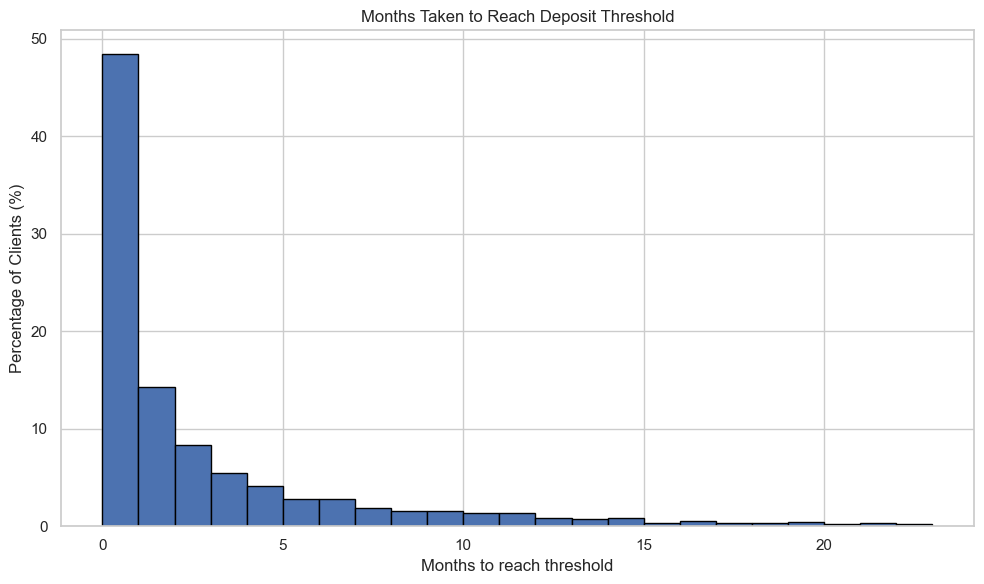

In [46]:
df_only_high_rollers = df_only_high_rollers.sort_values(["ClientId","TimestampHour"])
df_only_high_rollers['DepositAmountInEUR'] = df_only_high_rollers['DepositAmountInEUR'].fillna(0)

df_only_high_rollers['CumulativeSum'] = df_only_high_rollers.groupby('ClientId')['DepositAmountInEUR'].cumsum()

# Step 2: Filter records that cross the threshold
cross_threshold = df_only_high_rollers[df_only_high_rollers['CumulativeSum'] >= threshold].groupby('ClientId')['TimestampHour'].min()

# Step 3: Compute the difference in months
first_deposit = df_only_high_rollers.groupby('ClientId')['TimestampHour'].min()
months_to_threshold = (cross_threshold - first_deposit).dt.days/30    # Using 30.44 to approximate days in a month

counts, bin_edges = np.histogram(months_to_threshold, bins=range(-1, 24))

# Calculate the percentage for each bar
percentages = counts / counts.sum() * 100

# Plot the histogram using percentages
plt.figure(figsize=(10, 6))
plt.hist(months_to_threshold, bins=range(0, 24,1), edgecolor='black', weights=np.ones_like(months_to_threshold) / months_to_threshold.size * 100)
plt.xlabel('Months to reach threshold')
plt.ylabel('Percentage of Clients (%)')
plt.title('Months Taken to Reach Deposit Threshold')



plt.tight_layout()
plt.show()

In [47]:
len(cross_threshold)

3399

In [48]:
threshold

594.7648726563996

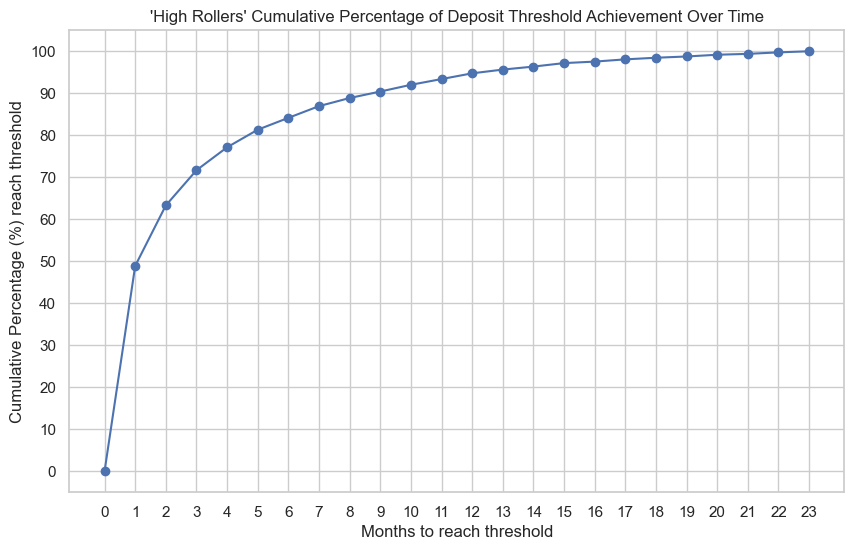

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(percentages.cumsum(),marker='o')
plt.grid()
plt.xlabel('Months to reach threshold')
plt.ylabel('Cumulative Percentage (%) reach threshold')
plt.title("'High Rollers' Cumulative Percentage of Deposit Threshold Achievement Over Time")
plt.xticks(range(0, 24,1))
plt.yticks(range(0, 110,10))
plt.grid()

In [50]:
with open('/Users/omrilapidot/Vbet_adjusted_data/dates1_df.pkl', 'rb') as f:
    dates1_df = pickle.load(f)

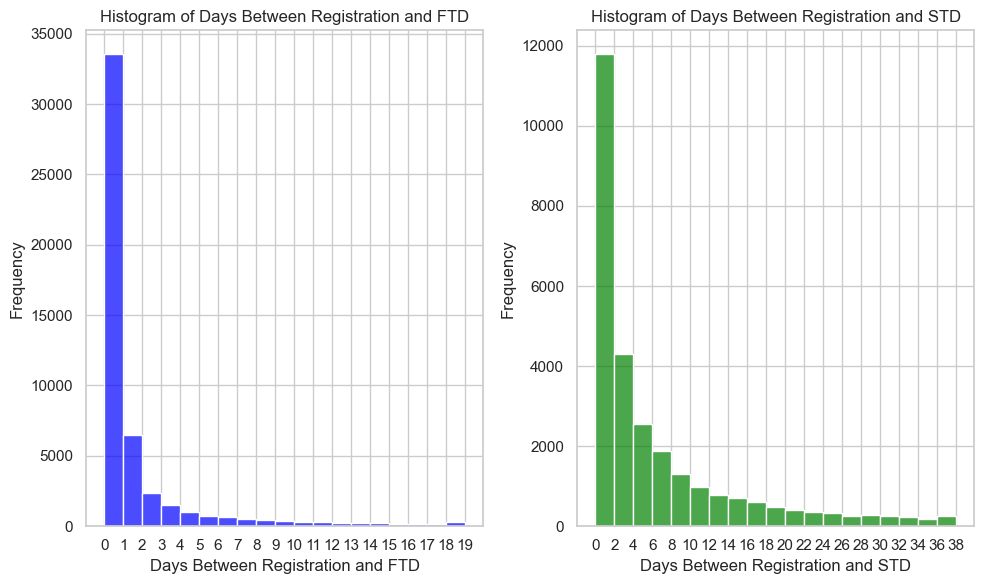

In [77]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Define custom bins
bins_ftd = range(0, 20, 1)
bins_std = range(0, 40, 2)

# Plot histogram for 'daysBetweenRegFTD'
sns.histplot(dates1_df['daysBetweenRegFTD'], bins=bins_ftd, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Days Between Registration and FTD')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Days Between Registration and FTD')
axes[0].set_xticks(bins_ftd)

# Plot histogram for 'daysBetweenRegSTD'
sns.histplot(dates1_df['daysBetweenRegSTD'], bins=bins_std, color='green', alpha=0.7, ax=axes[1])
axes[1].set_xlabel('Days Between Registration and STD')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Days Between Registration and STD')
axes[1].set_xticks(bins_std)

# Display the plots
plt.tight_layout()
plt.show()


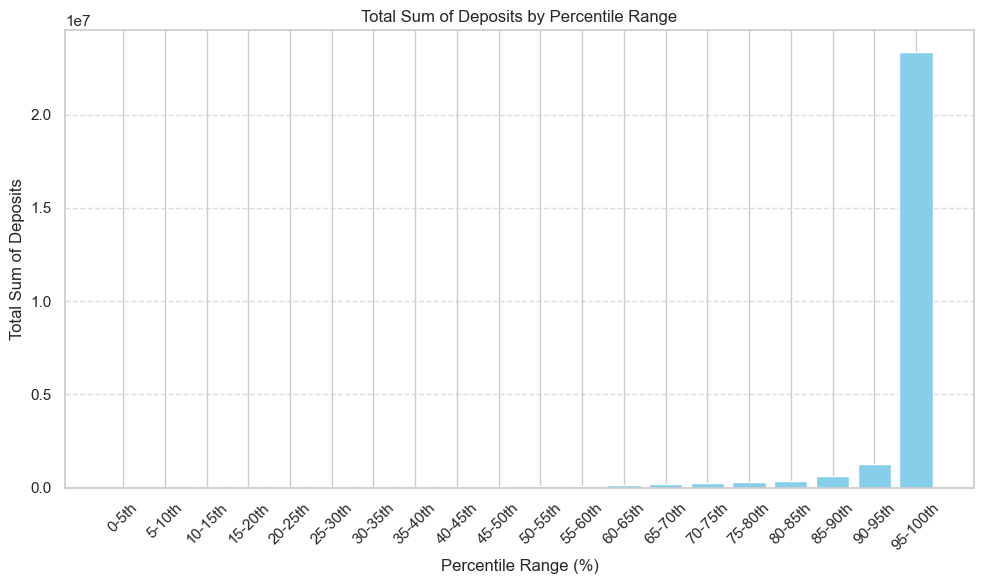

In [78]:
# Assuming your DataFrame is named 'dataframes["cube_finance"]'
df = dataframes["cube_finance"]

# Group the data by 'ClientId' and calculate the sum of 'DepositAmount' for each client
client_deposits = df.groupby('ClientId')['DepositAmountInEUR'].sum().reset_index()

# Calculate the percentiles for the client deposit totals
percentile_values = np.percentile(client_deposits['DepositAmountInEUR'], np.arange(0, 101, 5))

# Create percentile labels (these represent the percentile ranges)
percentile_labels = [f'{i}-{i+5}th' for i in range(0, 100, 5)]  # Adjust these labels as necessary

# Create bins based on the calculated percentiles
percentile_bins = np.digitize(client_deposits['DepositAmountInEUR'], bins=percentile_values, right=True)

# Group client deposits by these bins and calculate the sum for each bin
binned_deposit_sums = client_deposits.groupby(percentile_bins)['DepositAmountInEUR'].sum()

# Preparing the data so it aligns correctly with the desired percentile labels.
# This step ensures we do not have off-by-one errors in binning.
aligned_sums = [binned_deposit_sums.get(i, 0) for i in range(1, len(percentile_labels) + 1)]

# Create a bar plot for the total sum of deposits in each percentile range
plt.figure(figsize=(10, 6))
plt.bar(percentile_labels, aligned_sums, color='skyblue')
plt.title('Total Sum of Deposits by Percentile Range')
plt.xlabel('Percentile Range (%)')
plt.ylabel('Total Sum of Deposits')
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
df = dataframes["cube_finance"]
df=df[["TimestampHour","ClientId","DepositAmountInEUR"]]

In [54]:
# Step 1: Calculate the total deposit amount per 'ClientId'.
total_deposit_per_client = df.groupby('ClientId')['DepositAmountInEUR'].sum()

# Step 2: Calculate the 95th percentile of these total deposit amounts.
percentile_95 = total_deposit_per_client.quantile(0.95)

# Create a function to apply within each group
def cumsum_and_exceedance(group):
    # Calculate the cumulative sum
    group['CumulativeDeposit'] = group['DepositAmountInEUR'].ffill().cumsum()

    # Identify where the cumulative sum exceeds the threshold
    exceedance = group['CumulativeDeposit'] > percentile_95

    if exceedance.any():
        # Get the first instance where the condition is True
        first_instance = group.loc[exceedance.idxmax(), 'TimestampHour']
        
        # Ensure that only one record is returned by removing potential duplicate timestamps
        # or by handling them according to your specific case (e.g., choosing the earliest)
        return pd.Series(first_instance).iloc[0]  # This ensures a single value is returned
    else:
        return np.nan  # No exceedance found


# Step 3: Apply the function to each group (i.e., each 'ClientId')
first_exceedance = df.groupby('ClientId').apply(cumsum_and_exceedance)

# Step 4: Convert the results into a DataFrame.
result_df = first_exceedance.reset_index(name='TimeOfFirstExceedance')

# 'result_df' now contains, for each 'ClientId', the first time their cumulative deposit exceeded the 95th percentile.
# If they never exceeded the threshold, the corresponding entry would be NaN.


In [55]:
dates1_df = dates1_df.merge(result_df , on="ClientId",how="left")

In [56]:
dates1_df

,ClientId,RegDate,FirstDepositDate,SecondTransactionDate,daysBetweenRegFTD,daysBetweenRegSTD,TimeOfFirstExceedance
0,380211768,2021-05-08,2021-05-08 16:00:00,2021-05-12 15:00:00,0,4,NaT
1,583591209,2022-02-24,2022-02-25 10:00:00,2022-02-25 12:00:00,1,1,2022-11-04 21:00:00+00:00
2,829610428,2022-09-09,2022-09-10 02:00:00,2022-09-10 07:00:00,1,1,2022-11-18 20:00:00+00:00
3,441074097,2021-08-27,2021-08-27 11:00:00,NaT,0,1000,NaT
4,702002326,2022-06-05,2022-06-05 17:00:00,2022-06-05 19:00:00,0,0,2022-06-06 07:00:00+00:00
...,...,...,...,...,...,...,...
55683,439184098,2021-08-24,2021-08-24 20:00:00,NaT,0,1000,NaT
55684,554164913,2022-01-22,2022-01-22 17:00:00,NaT,0,1000,NaT
55685,344490420,2021-03-07,2021-03-07 17:00:00,2021-03-09 14:00:00,0,2,NaT
55686,510501516,2021-11-27,2021-11-27 14:00:00,2021-12-01 02:00:00,0,4,NaT


In [57]:
with open("/Users/omrilapidot/Vbet_adjusted_data/model_sol_dict", 'rb') as file:  # 'rb' is for read binary
    sol = pickle.load(file)

In [58]:
pd.DataFrame(sol["final_combined_df_2_month_after_FTD"])

,y_test,y_prob,users
27225,False,0.016320,557355769
64900,False,0.004081,1575620563
59380,False,0.005603,1427880145
52902,False,0.464627,1241267337
17526,False,0.005916,453627045
...,...,...,...
15694,False,0.006510,434816062
38385,False,0.033924,759736311
2638,False,0.002213,244995445
22497,False,0.008695,501777906


In [59]:
with open("/Users/omrilapidot/Vbet_adjusted_data/model_results", 'rb') as file:  # 'rb' is for read binary
    model_results = pickle.load(file)

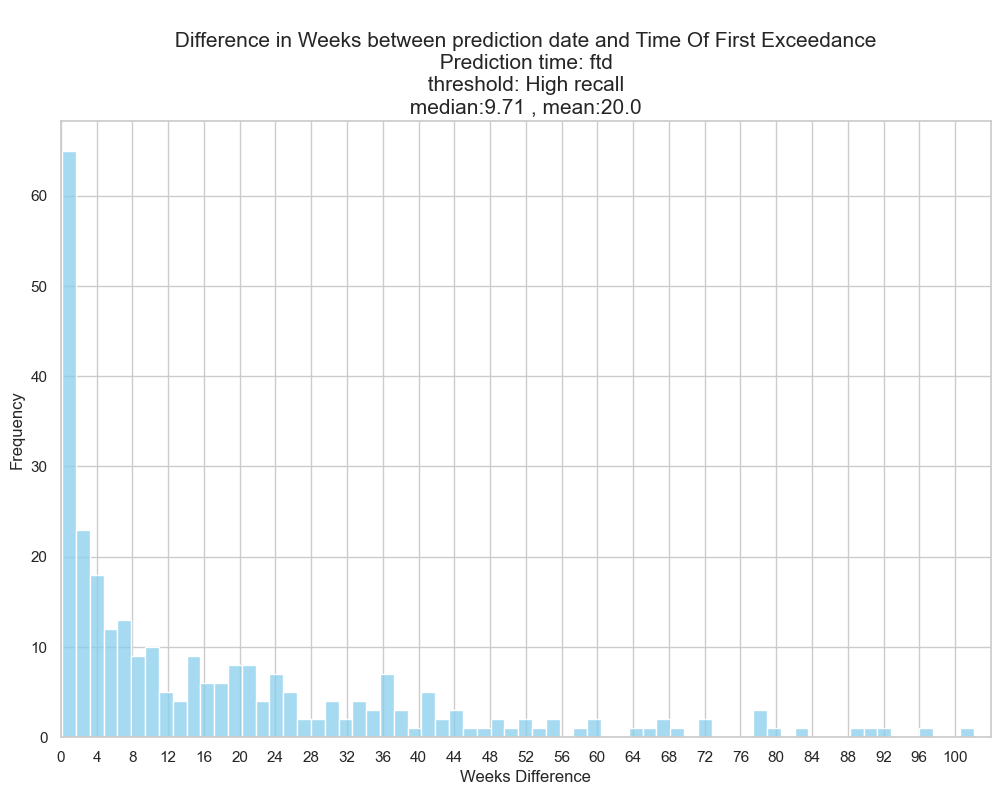

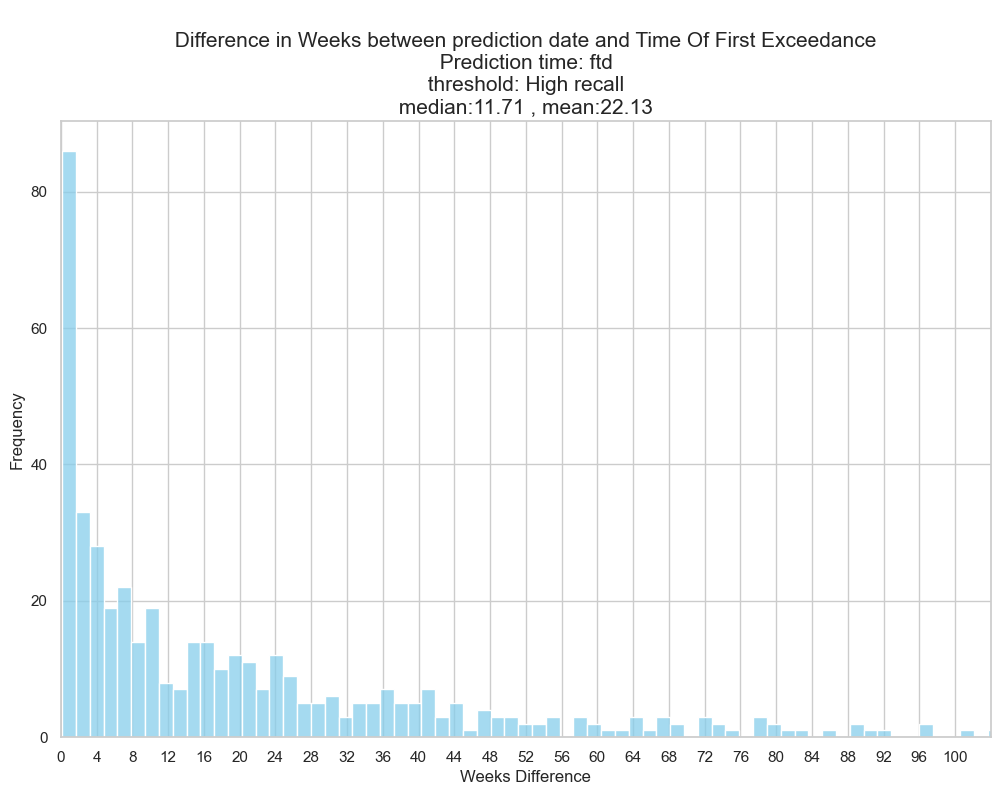

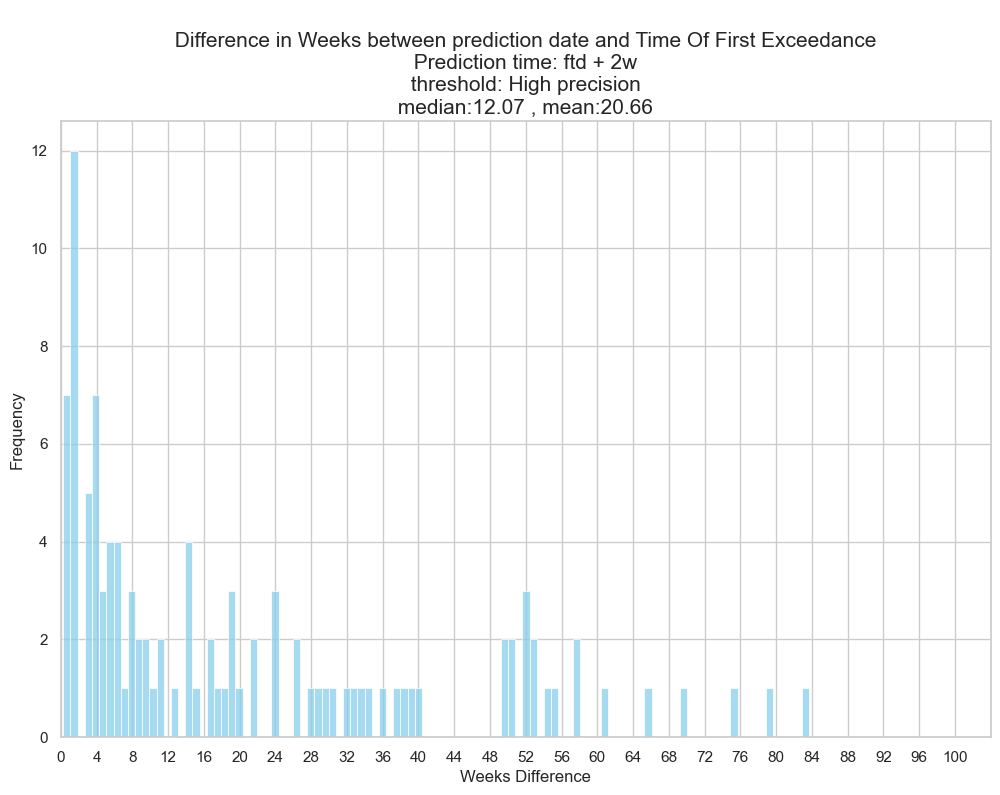

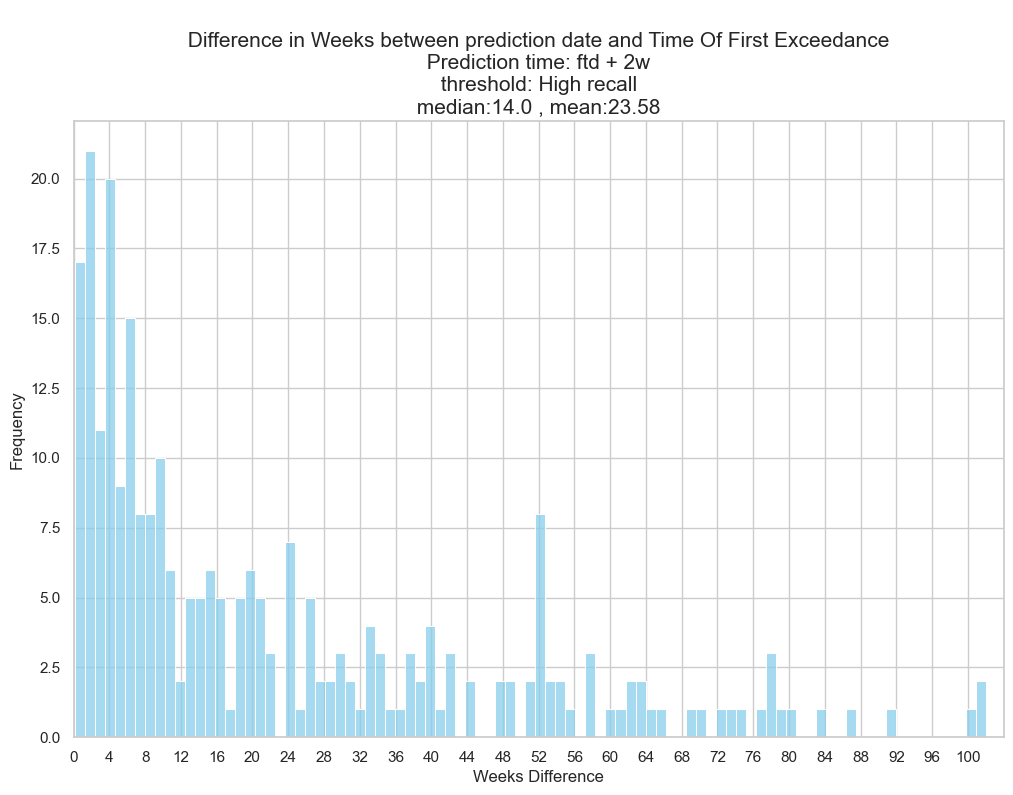

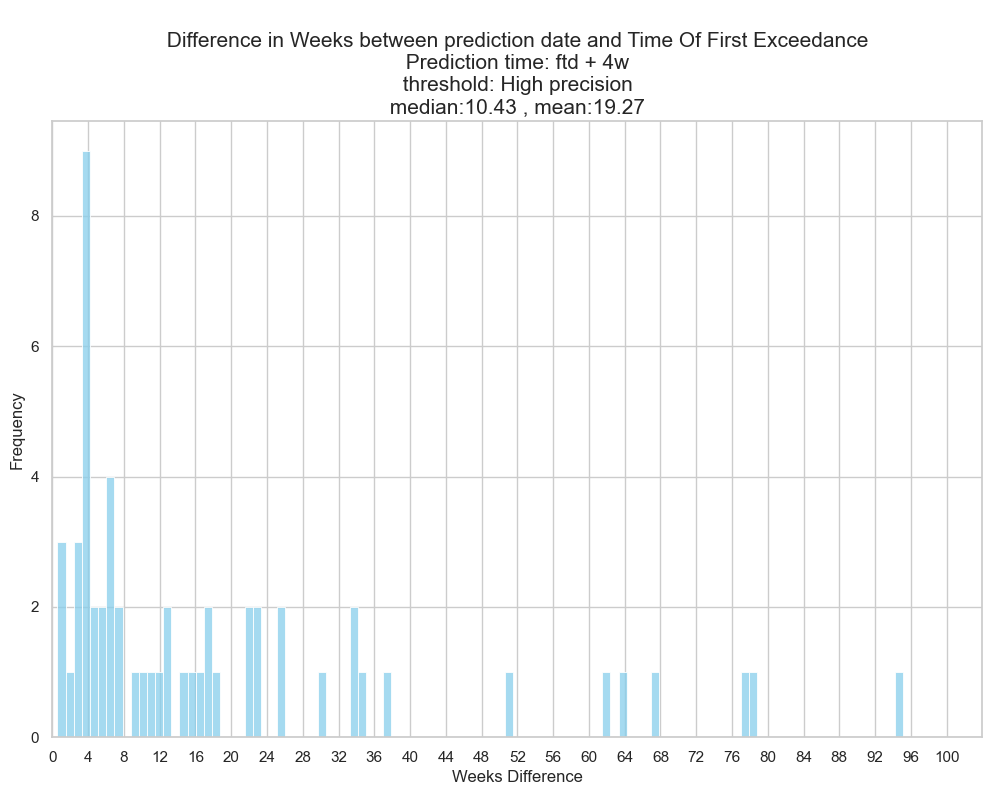

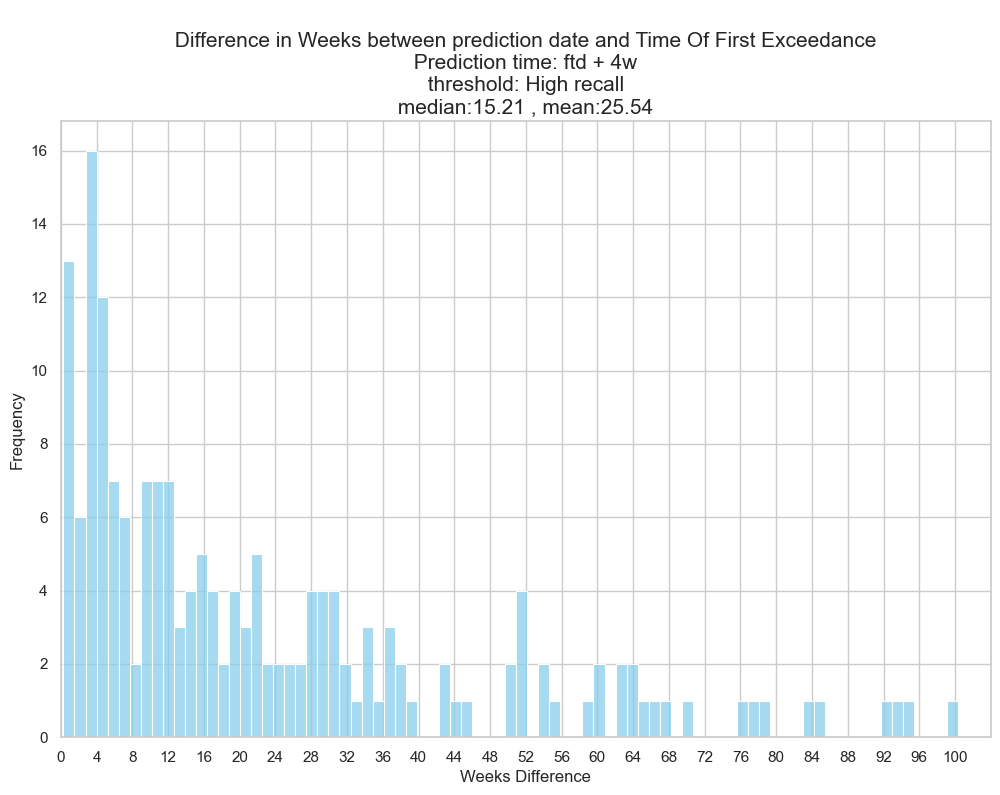

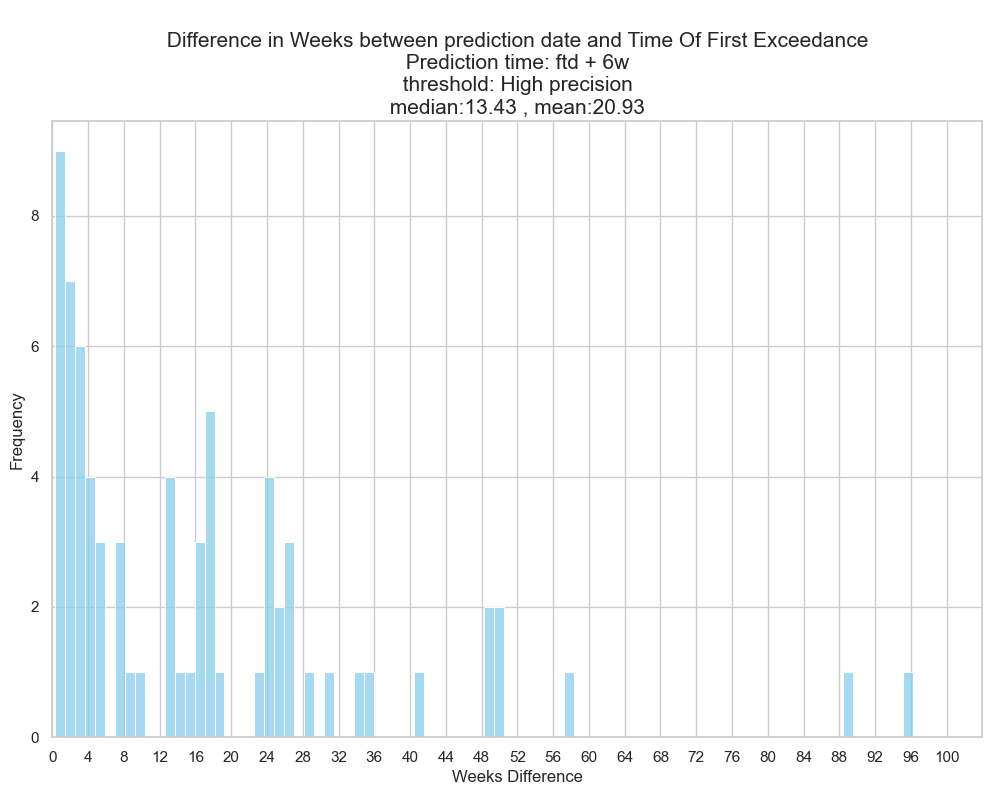

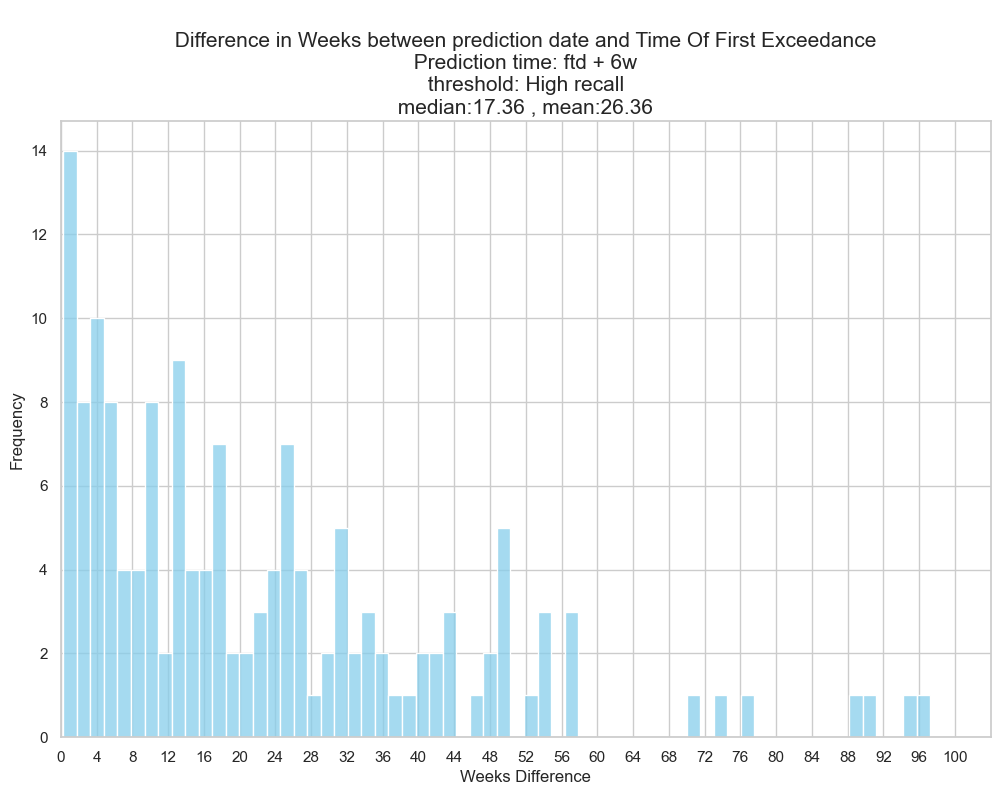

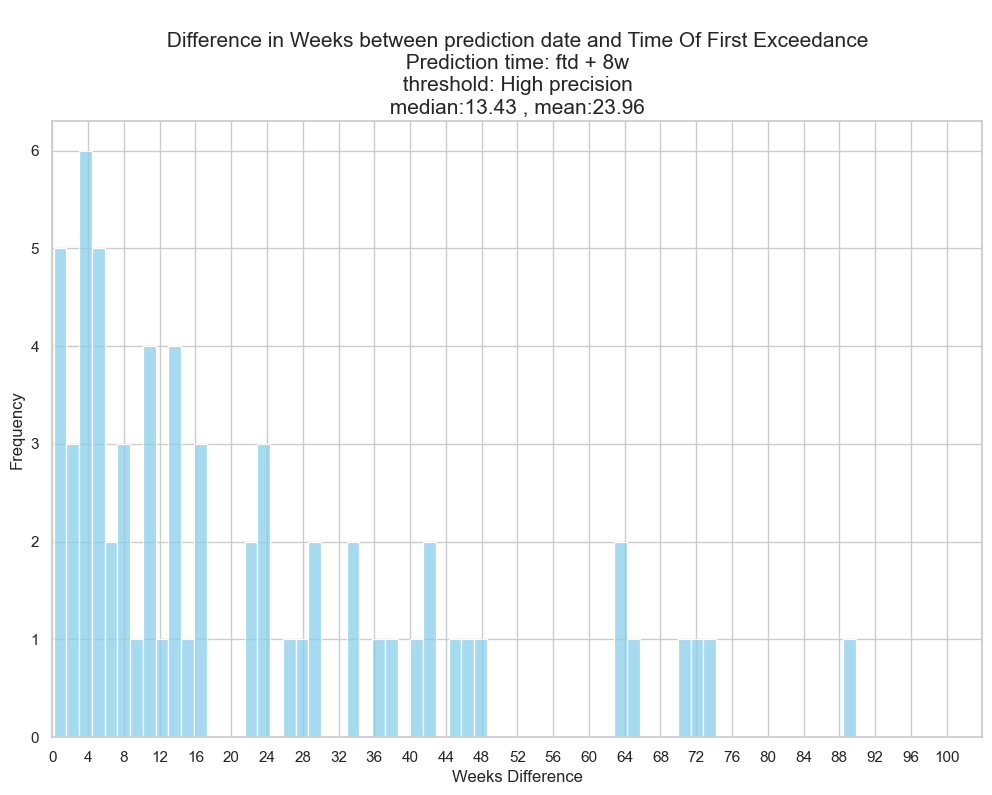

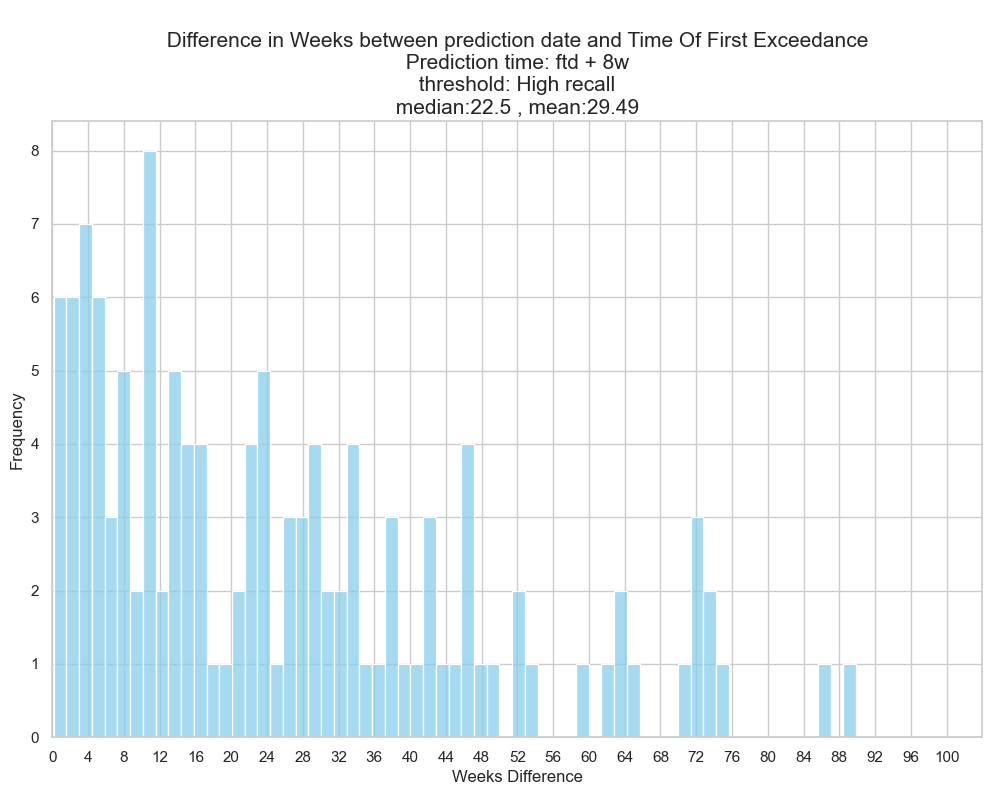

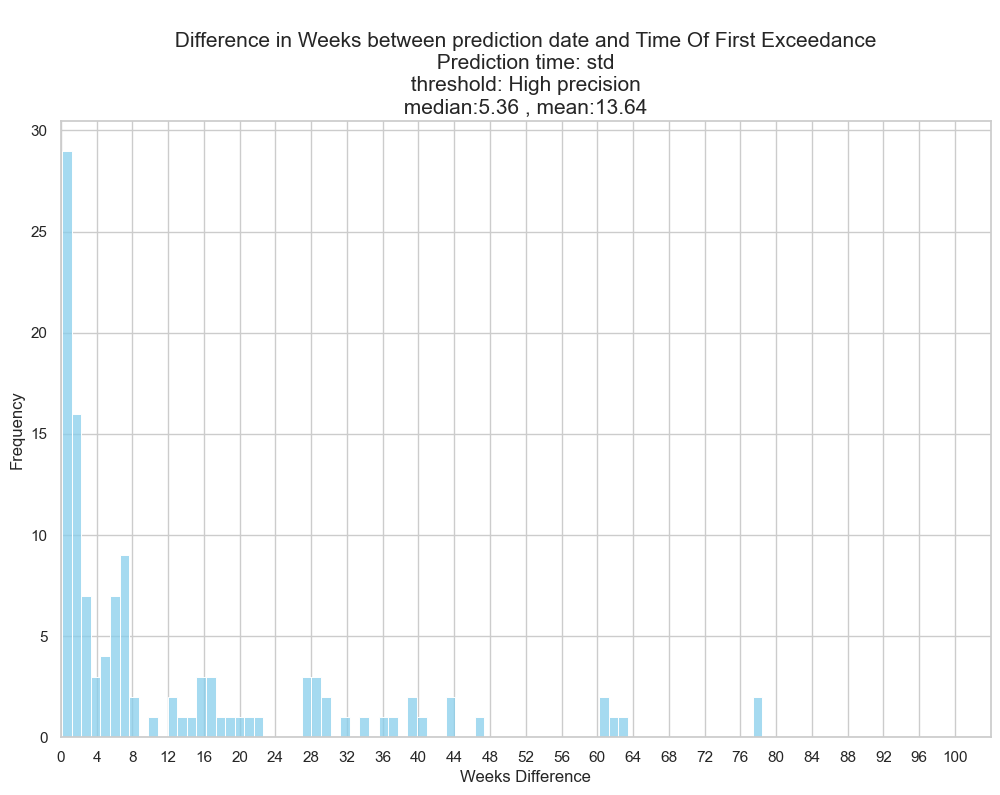

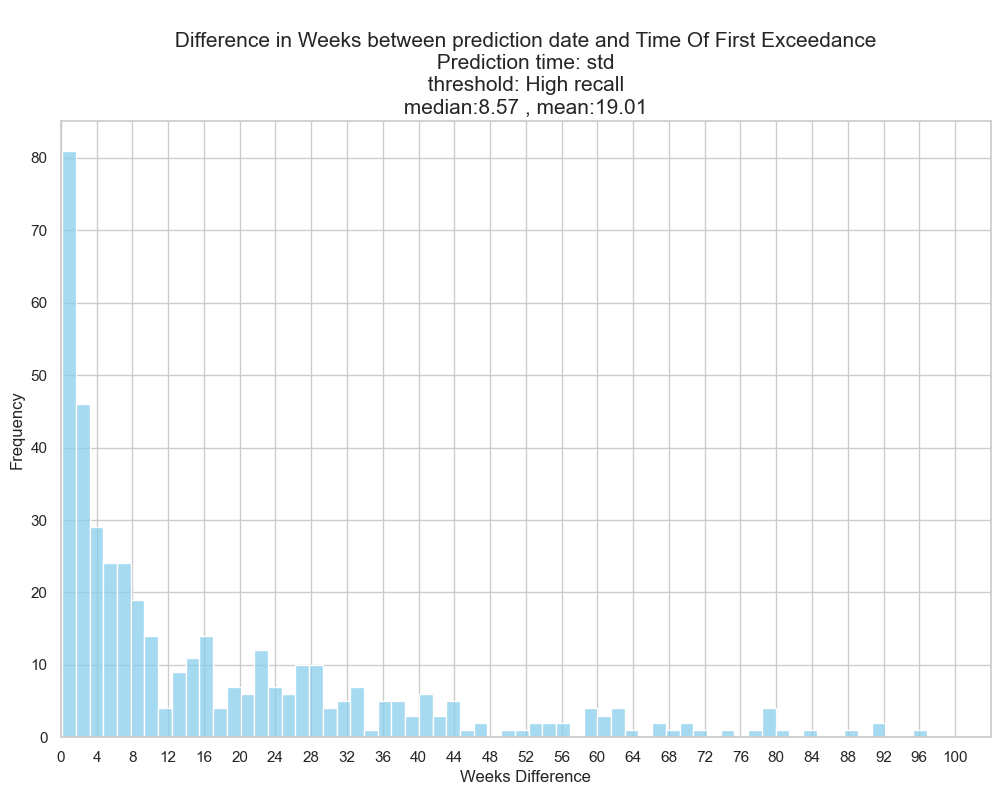

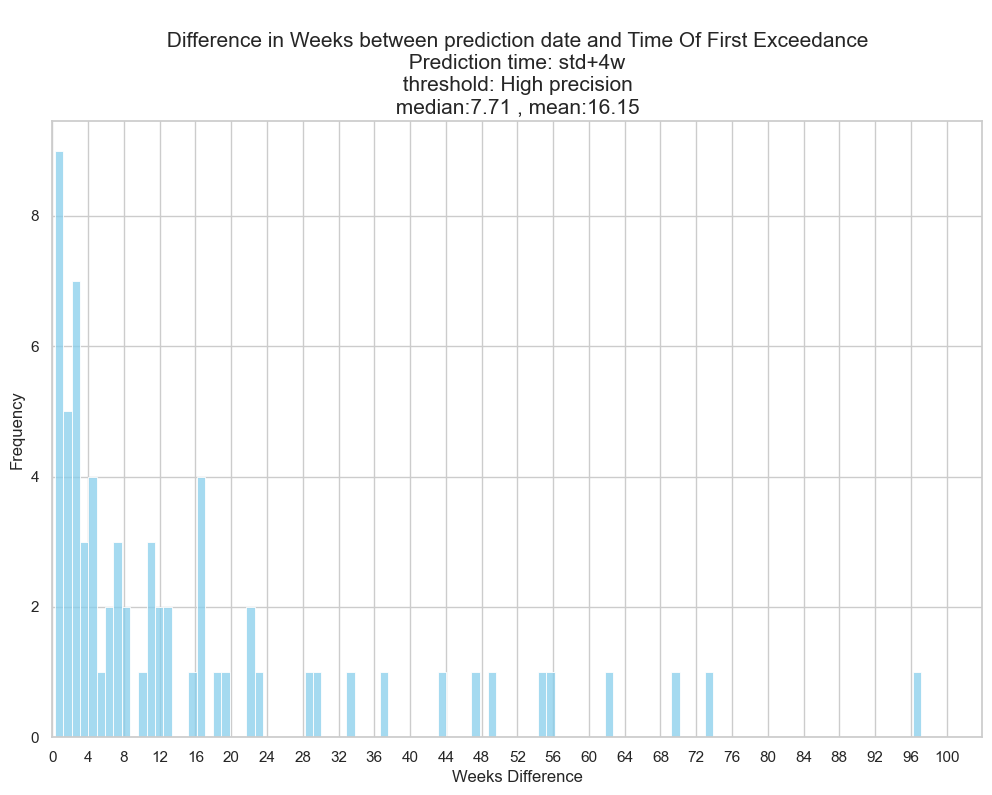

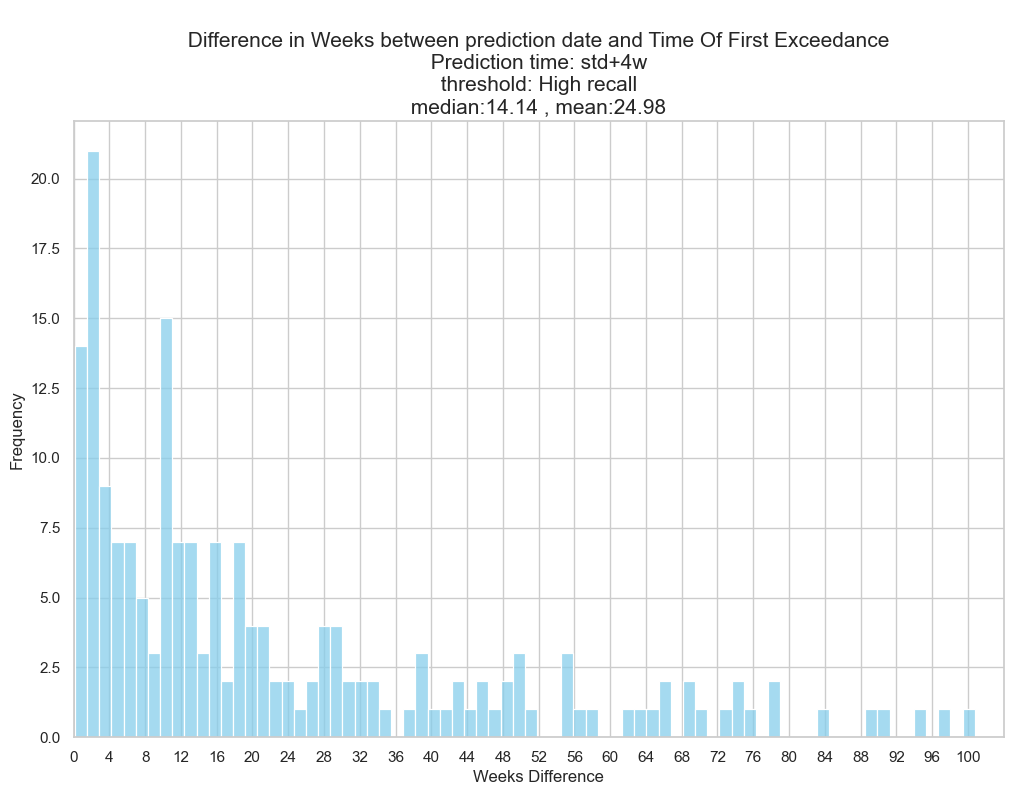

In [72]:
dataframe_mapping = {
        'ftd': 'final_combined_df_FTD',
        'ftd + 2w': 'final_combined_df_2_week_after_FTD',
        'ftd + 4w': 'final_combined_df_1_month_after_FTD',
        'ftd + 6w': 'final_combined_df_6_weeks_after_FTD',
        'ftd + 8w': 'final_combined_df_2_month_after_FTD',
        'std': 'final_combined_df_after_STD',
        'std+4w': 'final_combined_df_1_month_after_STD'
    }
    

for index, row in model_results.iterrows():
    df_name =row["Model"]
    t = row["threshold"]
    model_name = dataframe_mapping[df_name]
    if "2w" in df_name:
        num_of_week=2
        time_delta = pd.Timedelta(weeks=2)
    elif "4w" in df_name:
        num_of_week = 4
        time_delta = pd.Timedelta(weeks=4)
    elif "8w" in df_name:
        num_of_week = 8
        time_delta = pd.Timedelta(weeks=8)
    elif "6w" in df_name:
        num_of_week = 6
        time_delta = pd.Timedelta(weeks=6)
    else:  # for FTD
        num_of_week = 0
        time_delta = pd.Timedelta(days=0)

    ftd_of_std_transaction_date = None    
    if "ftd" in df_name:
        ftd_of_std_transaction_date = "FirstDepositDate"
            
    if "std" in df_name:
        ftd_of_std_transaction_date = "SecondTransactionDate"
    
    pred_df = pd.DataFrame(sol[model_name])
    pred_df.rename(columns={"users":"ClientId"}, inplace=True)
    pred_df["y_ped"] = pred_df["y_prob"]>t
    pred_df = pred_df[(pred_df["y_test"])&(pred_df["y_ped"])]
    pred_df = pred_df.merge(dates1_df, on="ClientId" , how="inner")
    pred_df["pred_date"] = pred_df[ftd_of_std_transaction_date]+time_delta
    
#     pred_df['TimeOfFirstExceedance'] = pred_df['TimeOfFirstExceedance'].dt.tz_localize('UTC')  # assuming the timezone is UTC
    pred_df['TimeOfFirstExceedance'] = pred_df['TimeOfFirstExceedance'].dt.tz_convert(None)

    # Now that both columns are timezone-aware, you can subtract them directly
    pred_df['days_diff'] = (pred_df['TimeOfFirstExceedance']-pred_df['pred_date']).dt.days/7
    pred_df = pred_df[pred_df["days_diff"]>0]
    # Continue with your plotting as before...
    if t >0.2:
        recall = "High precision"
    else:
        recall = "High recall"
    plt.figure(figsize=(12, 8))
    plt.xlim(0,104)
#     plt.yticks(np.arange(0,40,2))
    plt.xticks(np.arange(0,104,4))
    # plt.xscale("prob")
    sns.set(style="whitegrid")
    sns.histplot(pred_df['days_diff'], color="skyblue", bins=104, line_kws={'linewidth': 2})
    plt.title(f'\n Difference in Weeks between prediction date and Time Of First Exceedance \n Prediction time: {df_name} \n threshold: {recall} \n median:{round(pred_df["days_diff"].median(),2)} , mean:{round(pred_df["days_diff"].mean(),2)} ', fontsize=15)
    plt.xlabel('Weeks Difference', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.savefig(f"/Users/omrilapidot/Desktop/figs/Difference in Weeks between prediction date and Time Of First Exceedance/Difference in Weeks between prediction date and Time Of First Exceedance for {df_name} and threshold: {recall}")
    plt.show()

In [90]:
df = dataframes["cube_finance"]
df = df[["ClientId", "DepositAmountInEUR"]].groupby("ClientId").sum().rename(columns={"DepositAmountInEUR": "total_DepositAmountInEUR"})


In [105]:
for index, row in model_results.iterrows():
    df_name =row["Model"]
    t = row["threshold"]
    model_name = dataframe_mapping[df_name]
    if "2w" in df_name:
        num_of_week=2
        time_delta = pd.Timedelta(weeks=2)
    elif "4w" in df_name:
        num_of_week = 4
        time_delta = pd.Timedelta(weeks=4)
    elif "8w" in df_name:
        num_of_week = 8
        time_delta = pd.Timedelta(weeks=8)
    elif "6w" in df_name:
        num_of_week = 6
        time_delta = pd.Timedelta(weeks=6)
    else:  # for FTD
        num_of_week = 0
        time_delta = pd.Timedelta(days=0)
        
    if t >0.2:
        recall = "High precision"
    else:
        recall = "High recall"

    ftd_of_std_transaction_date = None    
    if "ftd" in df_name:
        ftd_of_std_transaction_date = "FirstDepositDate"
            
    if "std" in df_name:
        ftd_of_std_transaction_date = "SecondTransactionDate"
    
    pred_df = pd.DataFrame(sol[model_name])
    pred_df.rename(columns={"users":"ClientId"}, inplace=True)
    pred_df["y_ped"] = pred_df["y_prob"]>t
    pred_df = pred_df[(pred_df["y_test"])&(pred_df["y_ped"])]
    pred_df = pred_df.merge(df,on="ClientId")
    print(f'model name: {df_name},',f'threshold: {recall},' , f'mean_total_Deposit: {round(pred_df["total_DepositAmountInEUR"].mean())}')

model name: ftd, threshold: High recall, mean_total_Deposit: 8697
model name: ftd, threshold: High recall, mean_total_Deposit: 7413
model name: ftd + 2w, threshold: High precision, mean_total_Deposit: 5380
model name: ftd + 2w, threshold: High recall, mean_total_Deposit: 5479
model name: ftd + 4w, threshold: High precision, mean_total_Deposit: 7320
model name: ftd + 4w, threshold: High recall, mean_total_Deposit: 5675
model name: ftd + 6w, threshold: High precision, mean_total_Deposit: 4257
model name: ftd + 6w, threshold: High recall, mean_total_Deposit: 4851
model name: ftd + 8w, threshold: High precision, mean_total_Deposit: 6489
model name: ftd + 8w, threshold: High recall, mean_total_Deposit: 4829
model name: std, threshold: High precision, mean_total_Deposit: 5079
model name: std, threshold: High recall, mean_total_Deposit: 5322
model name: std+4w, threshold: High precision, mean_total_Deposit: 4429
model name: std+4w, threshold: High recall, mean_total_Deposit: 5592


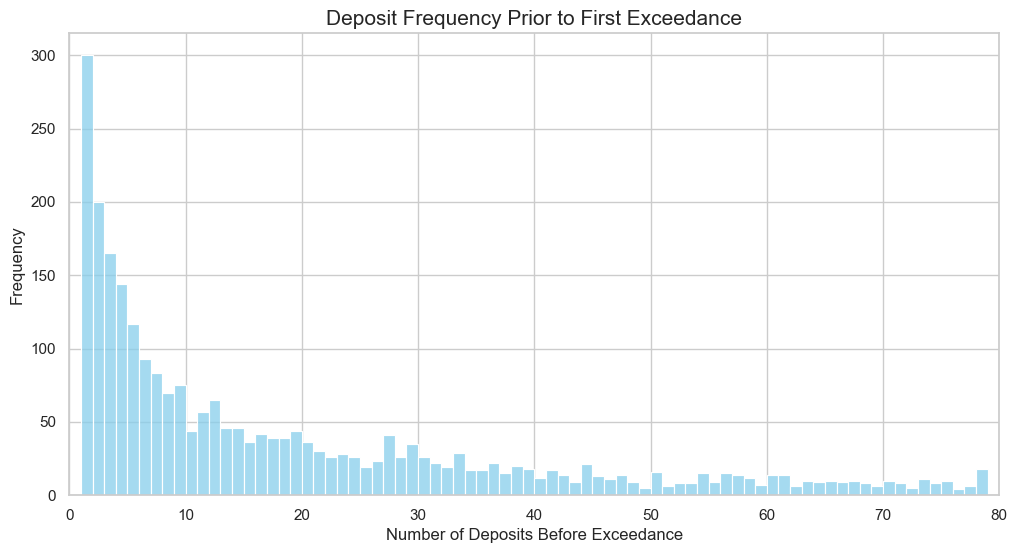

In [70]:
# Filter valid deposits and merge with dates data
valid_deposits_df = df[df["DepositAmountInEUR"].notna() & (df["DepositAmountInEUR"] > 0)]
merged_data = valid_deposits_df.merge(dates1_df, on="ClientId")

# Remove records without 'TimeOfFirstExceedance' and localize the timestamp
merged_data = merged_data[merged_data["TimeOfFirstExceedance"].notna()]
# merged_data['TimeOfFirstExceedance'] = merged_data['TimeOfFirstExceedance'].dt.tz_localize('UTC')

# Filter out records where 'TimestampHour' exceeds 'TimeOfFirstExceedance'
filtered_deposits_df = merged_data[merged_data["TimestampHour"] < merged_data["TimeOfFirstExceedance"]]

# Group by 'ClientId' and count occurrences
client_deposit_counts = filtered_deposits_df.groupby("ClientId").count()

# Plotting
plt.figure(figsize=(12, 6))
plt.xlim(0, 80)
sns.set(style="whitegrid")

# Create a histogram with refined settings
sns.histplot(
    client_deposit_counts['DepositAmountInEUR'], 
    color="skyblue", 
    bins=np.arange(0, 80, 1), 
    line_kws={'linewidth': 2}
)

# Enhancing titles and labels for professional look
plt.title("Deposit Frequency Prior to First Exceedance", fontsize=15)
plt.xlabel('Number of Deposits Before Exceedance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [108]:
dataframes["ClientKPI"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 878717 entries, 0 to 174
Data columns (total 87 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   ClientId                          878717 non-null  int64              
 1   Date                              878717 non-null  datetime64[ns]     
 2   Balance                           878717 non-null  float64            
 3   CasinoBalance                     878717 non-null  int64              
 4   DepositAmount                     878717 non-null  float64            
 5   DepositCount                      878717 non-null  int64              
 6   WithdrawalAmount                  878717 non-null  float64            
 7   WithdrawalCount                   878717 non-null  int64              
 8   RejectedWithdrawalAmount          878717 non-null  float64            
 9   RejectedWithdrawalCount           878717 non-null  int64